In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [4]:
path = '../tensorboard_logs/sgp_MNIST_proj_countsketch_scatter_deg_6_lr_0.001_epochs_50_final/events.out.tfevents.1642978353.fde120bc1a72'

In [5]:
ea = event_accumulator.EventAccumulator(path,
    size_guidance={ # see below regarding this argument
    event_accumulator.COMPRESSED_HISTOGRAMS: 500,
    event_accumulator.IMAGES: 4,
    event_accumulator.AUDIO: 4,
    event_accumulator.SCALARS: 0,
    event_accumulator.HISTOGRAMS: 1,
})

In [6]:
ea.Reload()

In [7]:
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': ['q_mean'],
 'scalars': ['test_loss',
  'test_mnll',
  'test_kl',
  'test_error',
  'time_elapsed',
  'train_loss',
  'train_mnll',
  'train_kl',
  'train_error',
  'feature_scale',
  'learning_rate',
  'kl_weight'],
 'distributions': ['q_mean'],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [8]:
ea.Scalars('test_loss')

[ScalarEvent(wall_time=1642978355.3570514, step=0, value=28538.458984375),
 ScalarEvent(wall_time=1642978370.0694687, step=1, value=2650.273681640625),
 ScalarEvent(wall_time=1642978384.7632139, step=2, value=2231.526123046875),
 ScalarEvent(wall_time=1642978399.4102447, step=3, value=2179.814697265625),
 ScalarEvent(wall_time=1642978414.0305884, step=4, value=2254.744873046875),
 ScalarEvent(wall_time=1642978428.7372885, step=5, value=2340.109130859375),
 ScalarEvent(wall_time=1642978443.3488526, step=6, value=2465.46728515625),
 ScalarEvent(wall_time=1642978457.856522, step=7, value=2573.908935546875),
 ScalarEvent(wall_time=1642978472.4255464, step=8, value=2748.172607421875),
 ScalarEvent(wall_time=1642978486.9201493, step=9, value=2860.94775390625),
 ScalarEvent(wall_time=1642978501.5684955, step=10, value=3002.10400390625),
 ScalarEvent(wall_time=1642978516.1658366, step=11, value=3085.656005859375)]

In [9]:
ea.Scalars('time_elapsed')

[ScalarEvent(wall_time=1642978355.3576477, step=0, value=0.0014405250549316406),
 ScalarEvent(wall_time=1642978370.0697236, step=1, value=14.574531555175781),
 ScalarEvent(wall_time=1642978384.7635908, step=2, value=29.312089920043945),
 ScalarEvent(wall_time=1642978399.41162, step=3, value=43.950992584228516),
 ScalarEvent(wall_time=1642978414.030946, step=4, value=58.60696792602539),
 ScalarEvent(wall_time=1642978428.7375748, step=5, value=73.24610900878906),
 ScalarEvent(wall_time=1642978443.3491561, step=6, value=87.86273193359375),
 ScalarEvent(wall_time=1642978457.8568218, step=7, value=102.39937591552734),
 ScalarEvent(wall_time=1642978472.4258614, step=8, value=116.96446228027344),
 ScalarEvent(wall_time=1642978486.9204192, step=9, value=131.51995849609375),
 ScalarEvent(wall_time=1642978501.5687995, step=10, value=146.09133911132812),
 ScalarEvent(wall_time=1642978516.1660957, step=11, value=160.73046875)]

In [19]:
times = pd.DataFrame(ea.Scalars('time_elapsed'))['value'].values
losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values

In [20]:
times

array([1.44052505e-03, 1.45745316e+01, 2.93120899e+01, 4.39509926e+01,
       5.86069679e+01, 7.32461090e+01, 8.78627319e+01, 1.02399376e+02,
       1.16964462e+02, 1.31519958e+02, 1.46091339e+02, 1.60730469e+02])

In [21]:
losses

array([0.89880002, 0.043     , 0.0325    , 0.0303    , 0.0287    ,
       0.0261    , 0.0241    , 0.0223    , 0.0219    , 0.0228    ,
       0.0236    , 0.024     ])

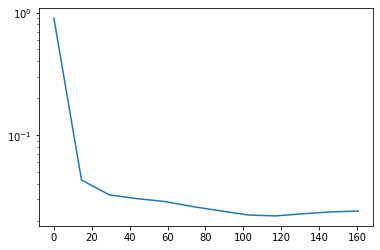

In [23]:
plt.plot(times, losses)
plt.yscale('log')
plt.show()